**1. Import Libraries and Warnings**

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Model Import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

**2. Import Data from CSV**

In [2]:
data= pd.read_csv('/content/drive/MyDrive/Data Science/Practice - ML/Note books/Project - 4/payment_fraud.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
data.head()

accountAgeDays  numItems  localTime paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402        paypal             28.204861   
1             725         1   4.742303   storecredit              0.000000   
2             845         1   4.921318    creditcard              0.000000   
3             503         1   4.886641    creditcard              0.000000   
4            2000         1   5.040929    creditcard              0.000000   

      Category  isWeekend  label  
0     shopping        0.0      0  
1  electronics        0.0      0  
2         food        1.0      0  
3  electronics        1.0      0  
4     shopping        0.0      0

**3. Understanding the Data**

In [4]:
data.dtypes

accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod            object
paymentMethodAgeDays    float64
Category                 object
isWeekend               float64
label                     int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [6]:
data.describe()

accountAgeDays      numItems     localTime  paymentMethodAgeDays  \
count    39221.000000  39221.000000  39221.000000          39221.000000   
mean       857.563984      1.084751      4.748232            122.641326   
std        804.788212      0.566899      0.389360            283.569177   
min          1.000000      1.000000      0.421214              0.000000   
25%         72.000000      1.000000      4.742303              0.000000   
50%        603.000000      1.000000      4.886641              0.012500   
75%       1804.000000      1.000000      4.962055             87.510417   
max       2000.000000     29.000000      5.040929           1999.580556   

          isWeekend         label  
count  38661.000000  39221.000000  
mean       0.499547      0.014278  
std        0.500006      0.118636  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000

**3. Exploratory Data Analysis (EDA)**

**3.1. Handling Null values if any**

In [7]:
data.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [8]:
# Handling Category and Weekend Column

data['Category'].fillna(data['Category'].mode()[0] , inplace= True)
data['isWeekend'].fillna(data['isWeekend'].median() , inplace= True)

In [9]:
data.head()

accountAgeDays  numItems  localTime paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402        paypal             28.204861   
1             725         1   4.742303   storecredit              0.000000   
2             845         1   4.921318    creditcard              0.000000   
3             503         1   4.886641    creditcard              0.000000   
4            2000         1   5.040929    creditcard              0.000000   

      Category  isWeekend  label  
0     shopping        0.0      0  
1  electronics        0.0      0  
2         food        1.0      0  
3  electronics        1.0      0  
4     shopping        0.0      0

In [10]:
data.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64

**3.2. Check for Duplicate values and Handle**

In [11]:
data.duplicated().sum()

np.int64(3046)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
len(data)

36175

**3.3. Checking for the data types and its value**

In [15]:
data['paymentMethod'].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

In [16]:
data['Category'].unique()

array(['shopping', 'electronics', 'food'], dtype=object)

In [17]:
data['isWeekend'].unique()

array([0., 1.])

In [18]:
data['isWeekend'].astype('int64')

0        0
1        0
2        1
3        1
4        0
5        0
6        1
7        0
8        0
9        1
10       0
11       0
12       0
13       0
14       1
15       1
16       1
17       1
18       0
19       1
20       0
21       0
22       0
23       1
24       1
25       1
26       0
27       1
28       1
29       0
30       0
31       1
32       0
33       1
34       1
35       1
36       1
37       1
38       1
39       1
40       0
41       0
42       0
43       0
44       0
45       0
46       1
47       0
48       0
49       1
50       0
51       1
52       1
53       0
54       0
55       0
56       0
57       0
58       0
59       1
60       0
61       0
62       1
63       0
64       1
65       1
66       0
67       1
68       1
69       1
70       0
71       1
72       0
73       1
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       1
85       1
86       1
87       0
88       1
89       1
90       0
91       0
92       0
93       0
94       1
95       0
96       1
97       1
98       0
99       0
100      0
101      0
102      0
103      0
104      0
105      0
106      0
107      0
108      0
109      0
110      0
111      1
112      1
113      0
114      1
115      1
116      1
117      1
118      0
119      0
120      0
121      0
122      0
123      0
124      0
125      1
126      1
127      0
128      0
129      1
130      0
131      0
132      0
133      0
134      0
135      0
136      0
137      0
138      0
139      0
140      1
141      1
142      1
143      1
144      0
145      0
146      0
147      0
148      1
149      0
150      0
151      1
152      1
153      0
154      1
155      1
156      1
157      1
158      1
159      1
160      1
161      0
162      1
163      1
164      1
165      1
166      0
167      1
168      1
169      0
170      1
171      0
172      1
173      0
174      0
175      1
176      0
177      1
178      1
179      0
180      1
181      0
182      0
183      0
184      1
185      1
186      1
187      0
188      0
189      1
190      1
191      1
192      0
193      0
194      0
195      1
196      0
197      1
198      1
199      1
200      1
201      1
202      1
203      1
204      1
205      1
206      0
207      1
208      0
209      0
210      1
211      1
212      0
213      0
214      0
215      0
216      1
217      0
218      0
219      1
220      1
221      1
222      0
223      0
224      0
225      0
226      1
227      0
228      0
229      1
230      0
231      1
232      1
233      0
234      1
235      1
236      1
237      0
238      0
239      1
240      0
241      0
242      1
243      0
244      0
245      1
246      0
247      0
248      1
249      0
250      0
251      0
252      0
253      1
254      1
255      0
256      0
257      1
258      0
259      1
260      1
261      0
262      1
263      0
264      0
265      1
266      0
267      1
268      0
269      0
270      1
271      0
272      0
273      0
274      0
275      0
276      0
277      0
278      1
279      1
280      0
281      1
282      0
283      1
284      1
285      0
286      1
287      0
288      0
289      0
290      0
291      1
292      1
293      1
294      1
295      0
296      1
297      1
298      0
299      1
300      0
301      1
302      0
303      0
304      1
305      1
306      1
307      0
308      0
309      0
310      0
311      1
312      1
313      1
314      1
315      1
316      0
317      0
318      0
319      1
320      0
321      1
322      0
323      1
324      0
325      1
326      0
327      1
328      0
329      1
330      0
331      0
332      0
333      1
334      1
335      1
336      1
337      1
338      0
339      0
340      1
341      0
342      1
343      0
344      1
345      0
346      1
347      0
348      0
349      0
350      1
351      1
352      0
353      0
354      1
355      1
356      1
357      1
358      0
359      0
360      0
361      0
362      0
363    

In [19]:
data.dtypes

accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod            object
paymentMethodAgeDays    float64
Category                 object
isWeekend               float64
label                     int64
dtype: object

**3.4. Understanding the Target Column**

In [20]:
round(data['label'].value_counts(normalize=True)*100,2)

label
0    98.92
1     1.08
Name: proportion, dtype: float64

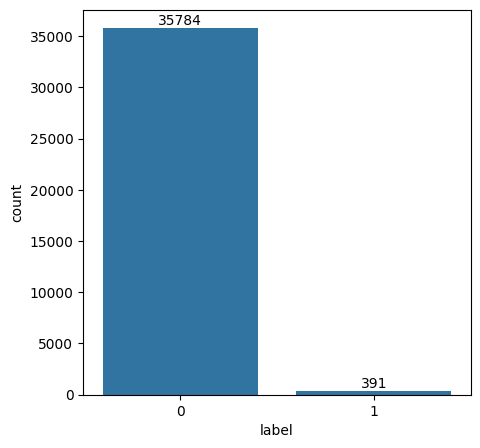

In [21]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data= data,x='label')
plt.bar_label(ax.containers[0])
plt.show()

**3.5. UniVariate Ananlysis**

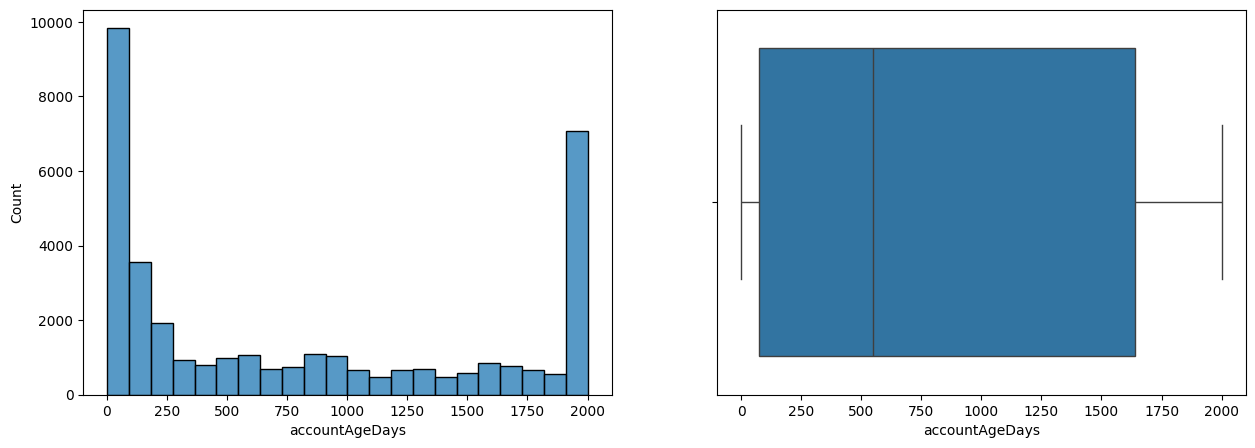

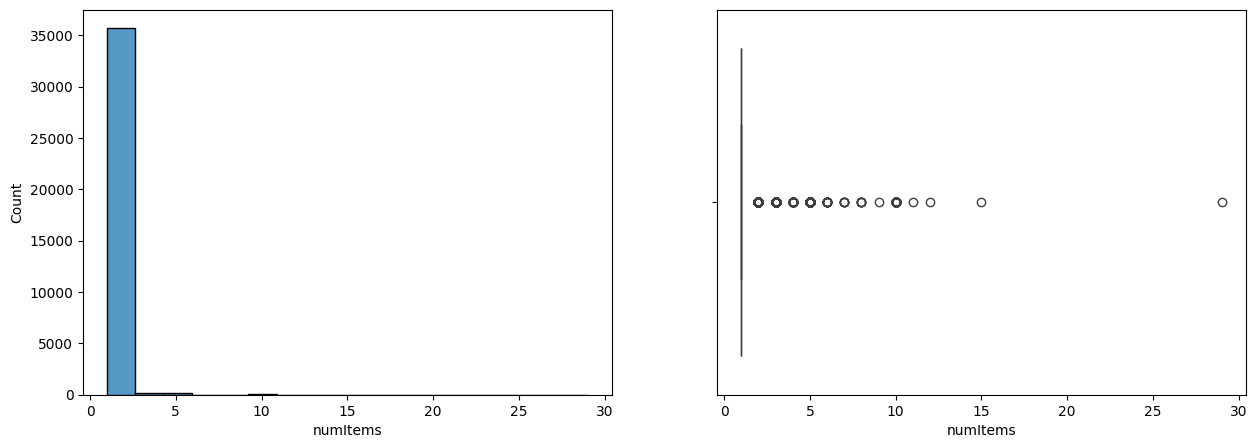

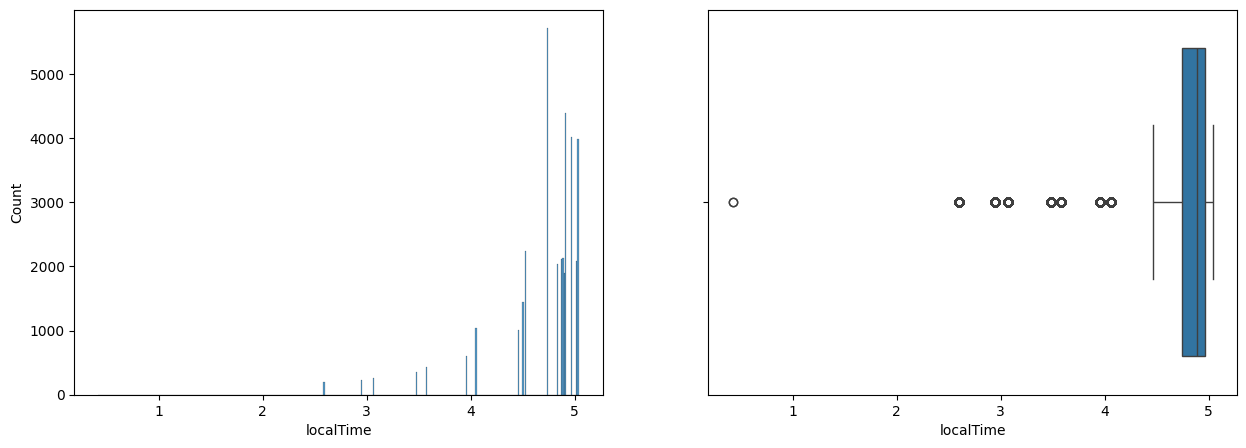

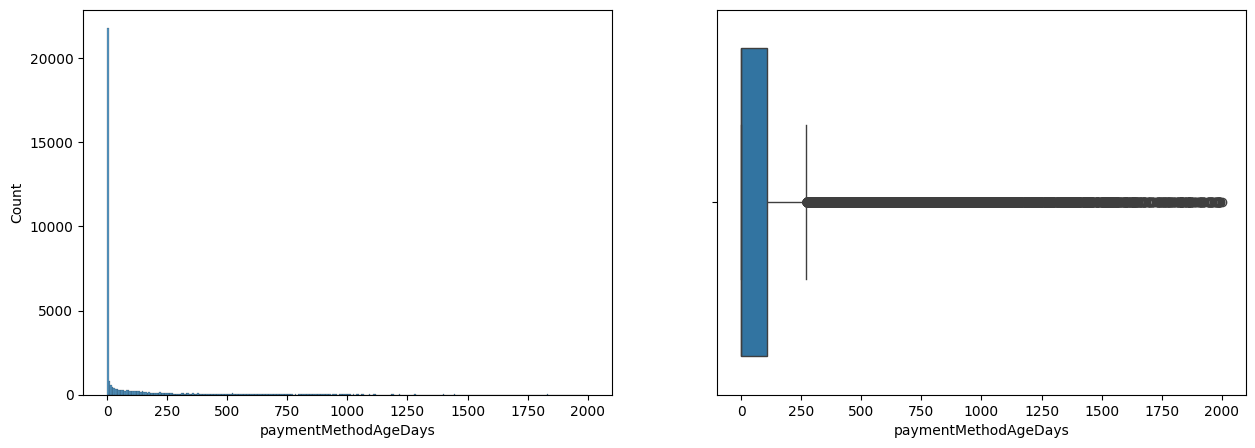

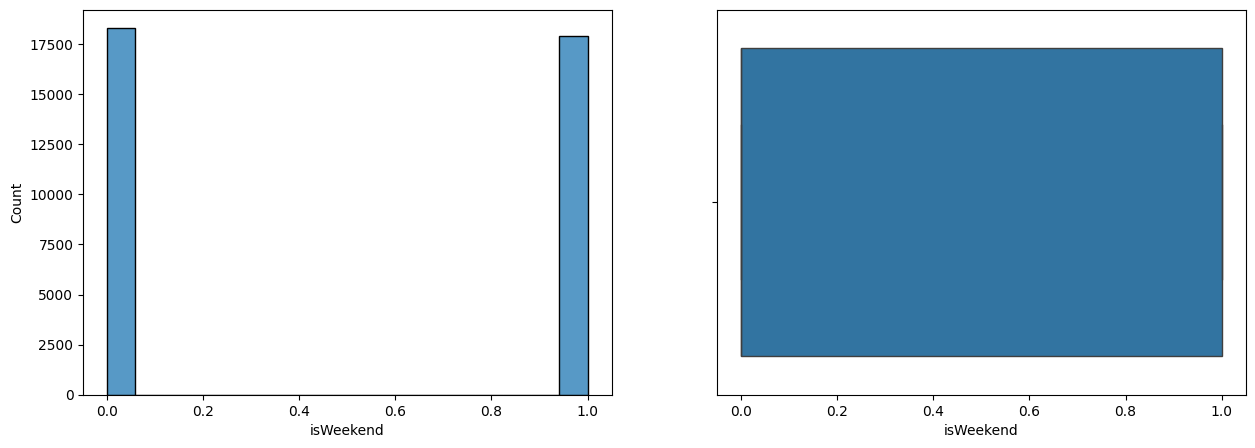

In [22]:
for cols in data.columns:
  if data[cols].dtype != 'O' and cols not in ['label']:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=data,x=cols)
    plt.subplot(1,2,2)
    sns.boxplot(data=data,x=cols)
    plt.show()

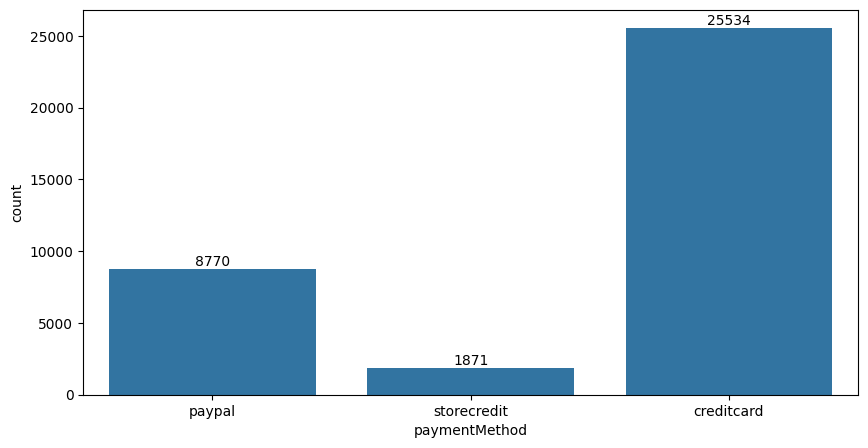

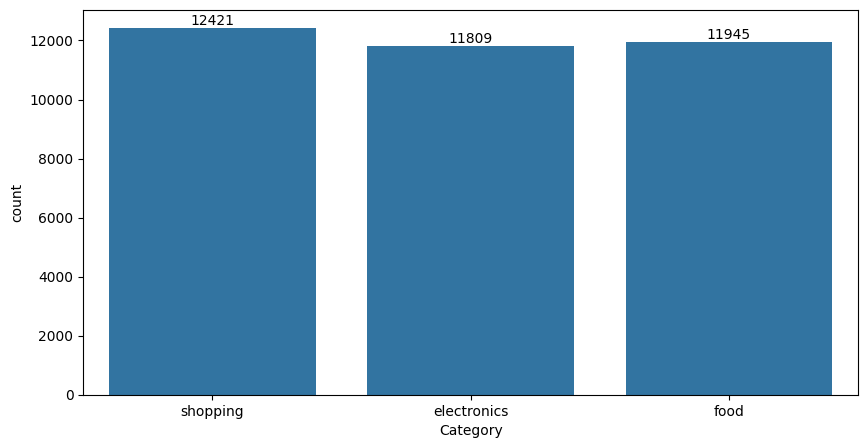

In [23]:
for cols in data.columns:
  if data[cols].dtype == 'O' and cols not in ['label']:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data=data,x=cols)
    plt.bar_label(ax.containers[0])
    plt.show()

**3.6. BiVariate Analysis**

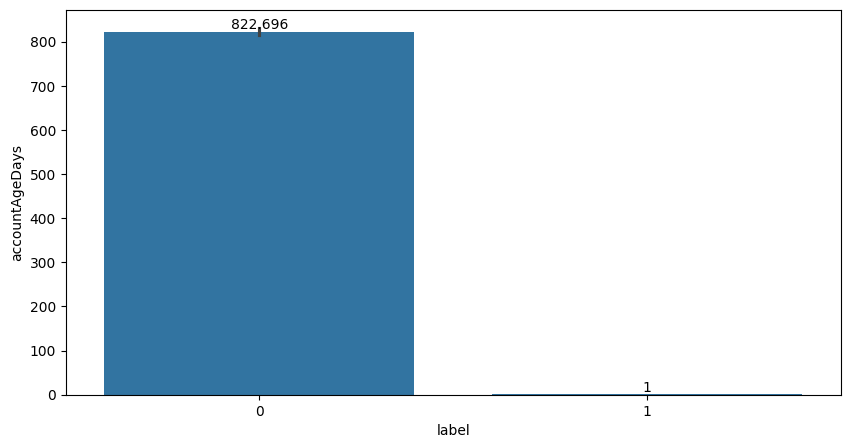

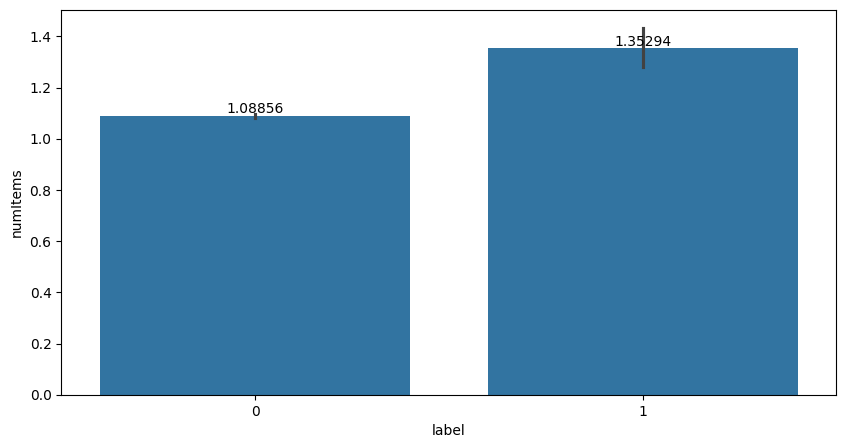

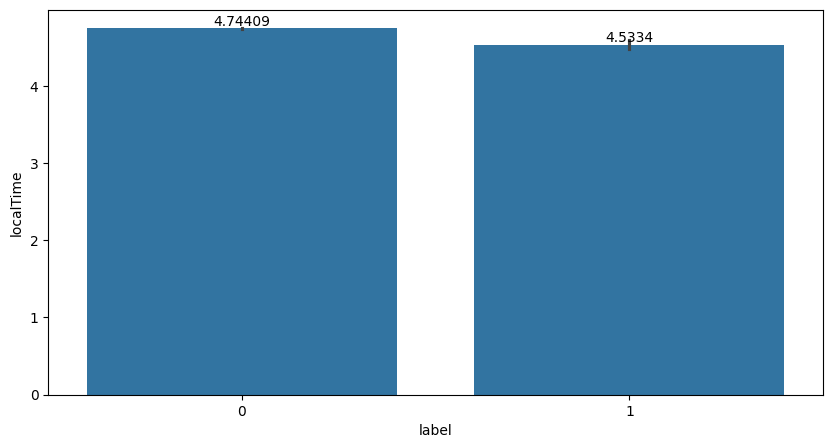

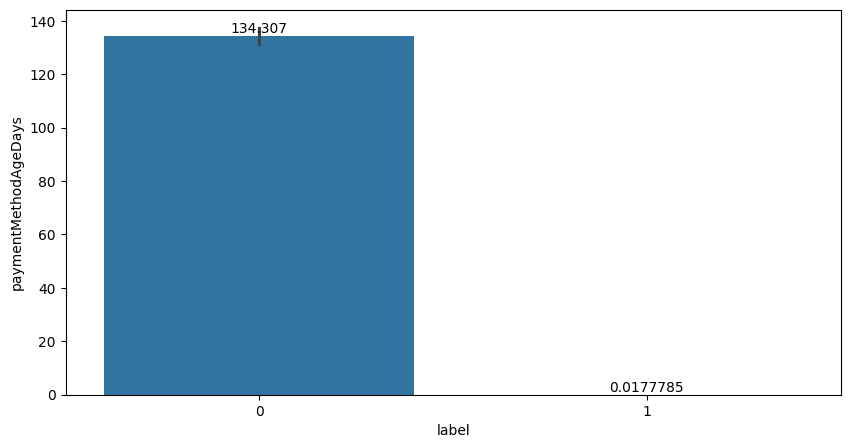

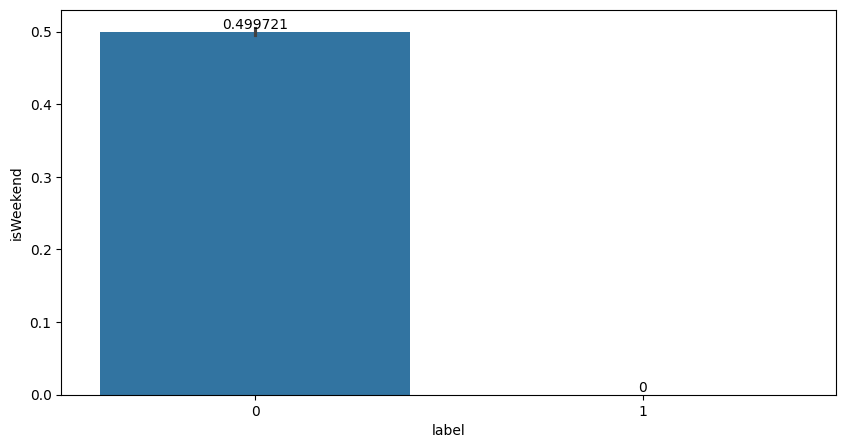

In [24]:
for cols in data.columns:
  if data[cols].dtype != 'O' and cols not in ['label']:
    plt.figure(figsize=(10,5))
    ax=sns.barplot(data=data,y=cols,x='label')
    plt.bar_label(ax.containers[0])
    plt.show()

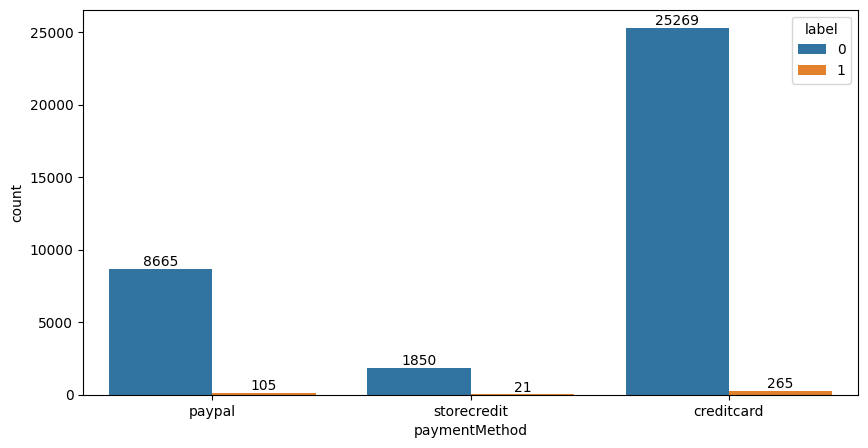

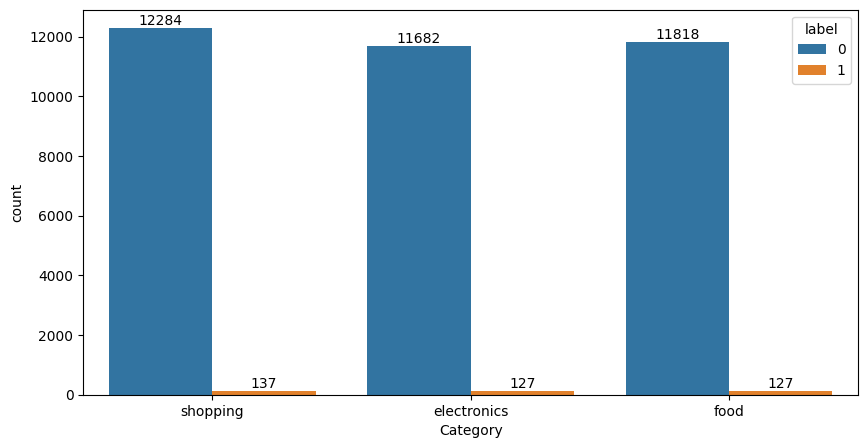

In [25]:
for cols in data.columns:
  if data[cols].dtype == 'O' and cols not in ['label']:
    plt.figure(figsize=(10,5))
    ax=sns.countplot(data=data,x=cols,hue='label')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.show()

**3.7. Encoding for Distance Based Algorithms**

In [26]:
encoder = LabelEncoder()
data['paymentMethod'] = encoder.fit_transform(data['paymentMethod'])
data['Category'] = encoder.fit_transform(data['Category'])

In [27]:
data.head()

accountAgeDays  numItems  localTime  paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402              1             28.204861   
1             725         1   4.742303              2              0.000000   
2             845         1   4.921318              0              0.000000   
3             503         1   4.886641              0              0.000000   
4            2000         1   5.040929              0              0.000000   

   Category  isWeekend  label  
0         2        0.0      0  
1         0        0.0      0  
2         1        1.0      0  
3         0        1.0      0  
4         2        0.0      0

**3.8. Correlation Matrix**

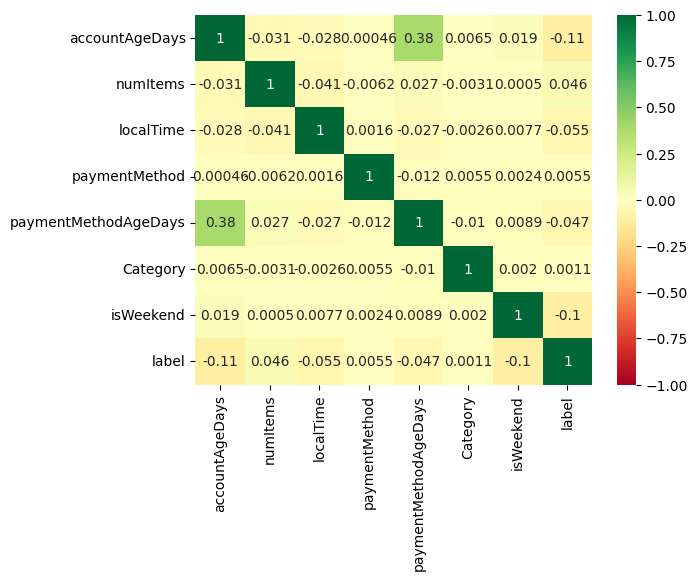

In [28]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn',vmin=-1,vmax=1 )
plt.show()

**4. Train - Test Split**

In [29]:
x= data.drop('label',axis=1)
y=data['label']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28940, 7)
(7235, 7)
(28940,)
(7235,)


**5. Standardisation**

In [31]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

**6. Sampling - SMOTE**

In [32]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [33]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm = train_test_split(x_smote,y_smote,test_size=0.2,random_state=42,stratify=y_smote)

In [34]:
x_train_smote=scaler.fit_transform(x_train_sm)
x_test_smote=scaler.transform(x_test_sm)

**6. Model Training**

In [35]:
dtree = DecisionTreeClassifier(class_weight='balanced')
dtree.fit(x_train,y_train)

print(f"Decision Tree Classifier Training score : {round(dtree.score(x_train,y_train)*100,2)} %")

y_pred_dt=dtree.predict(x_test)
print(f"Decision Tree Classifier Testing score : {round(accuracy_score(y_test,y_pred_dt)*100,2)} %")

Decision Tree Classifier Training score : 100.0 %
Decision Tree Classifier Testing score : 100.0 %


In [36]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(x_train,y_train)

print(f"Random Forest Classifier Training score : {round(rf.score(x_train,y_train)*100,2)} %")

y_pred_rf=rf.predict(x_test)
print(f"DRandom Forest Classifier Testing score : {round(accuracy_score(y_test,y_pred_rf)*100,2)} %")

Random Forest Classifier Training score : 100.0 %
DRandom Forest Classifier Testing score : 100.0 %


In [43]:
log = LogisticRegression(random_state = 42)
log.fit(x_train_smote,y_train_sm)

print(f"Log Regression Training score : {round(log.score(x_train_smote,y_train_sm)*100,2)} %")

y_pred_log=log.predict(x_test_smote)
print(f"Log Regression Testing score : {round(accuracy_score(y_test_sm,y_pred_log)*100,2)} %")

Log Regression Training score : 95.98 %
Log Regression Testing score : 95.92 %


              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7157
           1       0.92      1.00      0.96      7157

    accuracy                           0.96     14314
   macro avg       0.96      0.96      0.96     14314
weighted avg       0.96      0.96      0.96     14314



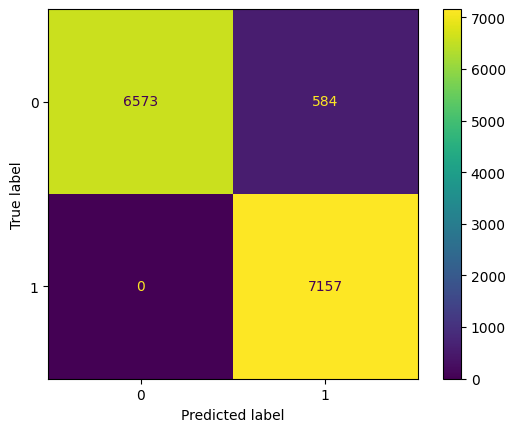

In [38]:
cm = ConfusionMatrixDisplay.from_predictions(y_test_sm, y_pred_log)
print(classification_report(y_test_sm, y_pred_log))

**7. HyperParamter Tuning**

In [44]:
param_grid = {
   'penalty':['l1', 'l2', 'elasticnet', None]
}

grid_search = GridSearchCV(log, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy')

In [45]:
# Displaying the best parameter and best score
print('Best Parmeter from the grid search:', grid_search.best_params_)
print('Score for the best parameter:', round(grid_search.best_score_*100, 2))

Best Parmeter from the grid search: {'penalty': 'l2'}
Score for the best parameter: 100.0


In [46]:
grid_search.get_params(deep=False)

{'cv': 5,
 'error_score': nan,
 'estimator': LogisticRegression(random_state=42),
 'n_jobs': -1,
 'param_grid': {'penalty': ['l1', 'l2', 'elasticnet', None]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [47]:
log.set_params(**grid_search.best_params_)

LogisticRegression(random_state=42)

In [48]:
log.fit(x_train_smote,y_train_sm)

print(f"Log Regression Training score after Hyper parameter Tuning : {round(log.score(x_train_smote,y_train_sm)*100,2)} %")

y_pred_log=log.predict(x_test_smote)
print(f"Log Regression Testing score after Hyper parameter Tuning: {round(accuracy_score(y_test_sm,y_pred_log)*100,2)} %")

Log Regression Training score after Hyper parameter Tuning : 95.98 %
Log Regression Testing score after Hyper parameter Tuning: 95.92 %


In [49]:
print("Logistic Regression Coefficients :", log.coef_)

Logistic Regression Coefficients : [[-4.09342417e+01  6.47868942e-01 -4.12974428e-01  1.52293485e-02
  -2.21594821e+01 -2.24007952e-02 -4.38276196e+00]]
